# Import modules

In [1]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tools import read_merged_data
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
random_state = 42
np.random.seed(random_state)

# Load Data

In [3]:
merged_data = read_merged_data(124)
merged_df = pd.concat(merged_data, axis = 0)
merged_df.head()

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask,alpha,beta,LOB,mid_price,low_ask,high_bid,Volume,Tapes Price,Last Tapes Price
combined_time,,,,,,,,,,,,,
2025-01-02 08:00:00,[1 6],,,,NaN,NaN,"[['bid', [[1, 6]]], ['ask', []]]",NaN,NaN,1.0,NaN,NaN,NaN
2025-01-02 08:00:01,[261 1],[800 1][799 1][798 1][797 1],,[800 1][799 1][798 1],0.002986,0.015020,"[['bid', [[261, 1], [1, 6]]], ['ask', [[797, 1...",529.0,797.0,261.0,NaN,NaN,NaN
2025-01-02 08:00:02,[262 6],[338 3][297 5],[1 6],,0.238553,0.165031,"[['bid', [[262, 6], [261, 1]]], ['ask', [[297,...",279.5,297.0,262.0,NaN,NaN,NaN
2025-01-02 08:00:03,[263 6][264 6],[296 1][309 3][334 4][292 5][291 1][296 4],[262 6][263 6],[338 3][297 5][797 1][296 1] [309 3],0.524854,0.429582,"[['bid', [[264, 6], [261, 1]]], ['ask', [[291,...",277.5,291.0,264.0,NaN,NaN,NaN
2025-01-02 08:00:04,,[288 5][307 4][287 1] [296 3][287 4][300 4][28...,,[292 5][334 4][296 4][287 1] [296 3][307 4][29...,0.820913,0.541382,"[['bid', [[264, 6], [261, 1]]], ['ask', [[286,...",275.0,286.0,264.0,NaN,NaN,NaN


In [4]:
merged_df["zeta"] = merged_df["alpha"] - merged_df["beta"]
merged_df["spread"] = merged_df["low_ask"] - merged_df["high_bid"]
merged_df["gap"] = merged_df["mid_price"] - merged_df["Last Tapes Price"]

# Prepare Samples

In [5]:
def generate_sample(day, day_index, rnd, sizings, sample_index, sampling_rate) -> pd.DataFrame:
    train_start_time = day.index[rnd] # when referencing start <= segment < end
    train_end_time = day.index[rnd + sizings[0]]
    test_end_time1 = day.index[rnd + sizings[1]]
    test_end_time2 = day.index[rnd + sizings[2]]
    test_end_time3 = day.index[rnd + sizings[3]]
    row = {"sample_index": sample_index,
           "train_size (s)": sizings[0],
           "day_index": day_index,
           "train_start_time": train_start_time,
           "train_end_time": train_end_time,
           "test_end_time1": test_end_time1,
           "test_end_time2": test_end_time2,
           "test_end_time3": test_end_time3,
           "sampling_rate (s)": sampling_rate}
    row = pd.DataFrame([row])
    return row

# extract intra day segments
# train/test size

sample_index = 0
indicies = pd.DataFrame()
for i, d in enumerate(merged_data):
    print(i, end = "\r")
    N = len(d)
    # random samples (3 each)

    for _ in range(10):
        # 1 min / 1s,10s,20s - (60,61,70,80)
        sizings = (60,61,70,80)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 1)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

        
        # 12 min / 12s,2min,4min
        sizings = (12*60, 12*60+12, 14*60, 16*60)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 1)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

        # 60 min / 1min,10min,20min
        sizings = (60*60, 61*60, 70*60, 80*60)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 2)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

    # fixed samples
    # 3hr / 3min,30min,1hr
    # start_times = (8:00, 10:15, 12:30)
    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 0, sizings, sample_index, 5) # 8:00
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 15*60*9, sizings, sample_index, 5) # 10:15
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 30*60*9 - 1, sizings, sample_index, 5) # 12:30
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

indicies.index = indicies["sample_index"]
indicies.drop("sample_index", axis = 1, inplace=True)
indicies

,train_size (s),day_index,train_start_time,train_end_time,test_end_time1,test_end_time2,test_end_time3,sampling_rate (s)
sample_index,,,,,,,,
0,60,0,2025-01-02 14:34:14,2025-01-02 14:35:14,2025-01-02 14:35:15,2025-01-02 14:35:24,2025-01-02 14:35:34,1
1,720,0,2025-01-02 12:23:15,2025-01-02 12:35:15,2025-01-02 12:35:27,2025-01-02 12:37:15,2025-01-02 12:39:15,1
2,3600,0,2025-01-02 08:14:20,2025-01-02 09:14:20,2025-01-02 09:15:20,2025-01-02 09:24:20,2025-01-02 09:34:20,2
3,60,0,2025-01-02 09:29:50,2025-01-02 09:30:50,2025-01-02 09:30:51,2025-01-02 09:31:00,2025-01-02 09:31:10,1
4,720,0,2025-01-02 13:59:35,2025-01-02 14:11:35,2025-01-02 14:11:47,2025-01-02 14:13:35,2025-01-02 14:15:35,1
...,...,...,...,...,...,...,...,...
4120,720,124,2025-07-01 14:13:53,2025-07-01 14:25:53,2025-07-01 14:26:05,2025-07-01 14:27:53,2025-07-01 14:29:53,1
4121,3600,124,2025-07-01 08:18:09,2025-07-01 09:18:09,2025-07-01 09:19:09,2025-07-01 09:28:09,2025-07-01 09:38:09,2
4122,10800,124,2025-07-01 08:00:00,2025-07-01 11:00:00,2025-07-01 11:03:00,2025-07-01 11:30:00,2025-07-01 12:00:00,5


# 60min

In [6]:
sixty_df = pd.DataFrame()

def y_score(diff):
    if abs(diff) < 0.001:
        return 0
    elif diff > 0:
        return 1
    else:
        return -1

for i, row in indicies[indicies["train_size (s)"] == 3600].iterrows():
    print(i, end = "\r")
    segment = merged_df[(merged_df.index >= row["train_start_time"]) & (merged_df.index < row["train_end_time"])]
    x = {}
    for col in list(segment.columns):
        s = segment[col]
        if col in ["alpha", "beta", "spread", "zeta"]:
            x[col] = s.fillna(0).mean()
            
        elif col in ["Volume"]:
            x[col] = s.fillna(0).mean() / 5 # light normalisation

        elif col in ["gap"]:
            x[col] = s.mean()

        if col in ["alpha", "beta", "low_ask", "mid_price", "high_bid", "Last Tapes Price", "Volume", "spread", "zeta", "gap"]:
            s = s.dropna()
            x[col+"_trend"] = np.corrcoef(s.index.astype(np.int64) // 10**9,s)[0, 1]
            if col != "Volume":
                x[col+"_delta"] = s.iloc[-1] - s.iloc[0]

    x["y1"] = y_score(merged_df.loc[row["test_end_time1"]]["Last Tapes Price"] - merged_df.loc[row["train_end_time"]]["Last Tapes Price"])
    x["y2"] = y_score(merged_df.loc[row["test_end_time2"]]["Last Tapes Price"] - merged_df.loc[row["train_end_time"]]["Last Tapes Price"])
    x["y3"] = y_score(merged_df.loc[row["test_end_time3"]]["Last Tapes Price"] - merged_df.loc[row["train_end_time"]]["Last Tapes Price"])

    sixty_df = pd.concat([sixty_df, pd.DataFrame([x])])

sixty_df.reset_index(inplace=True)

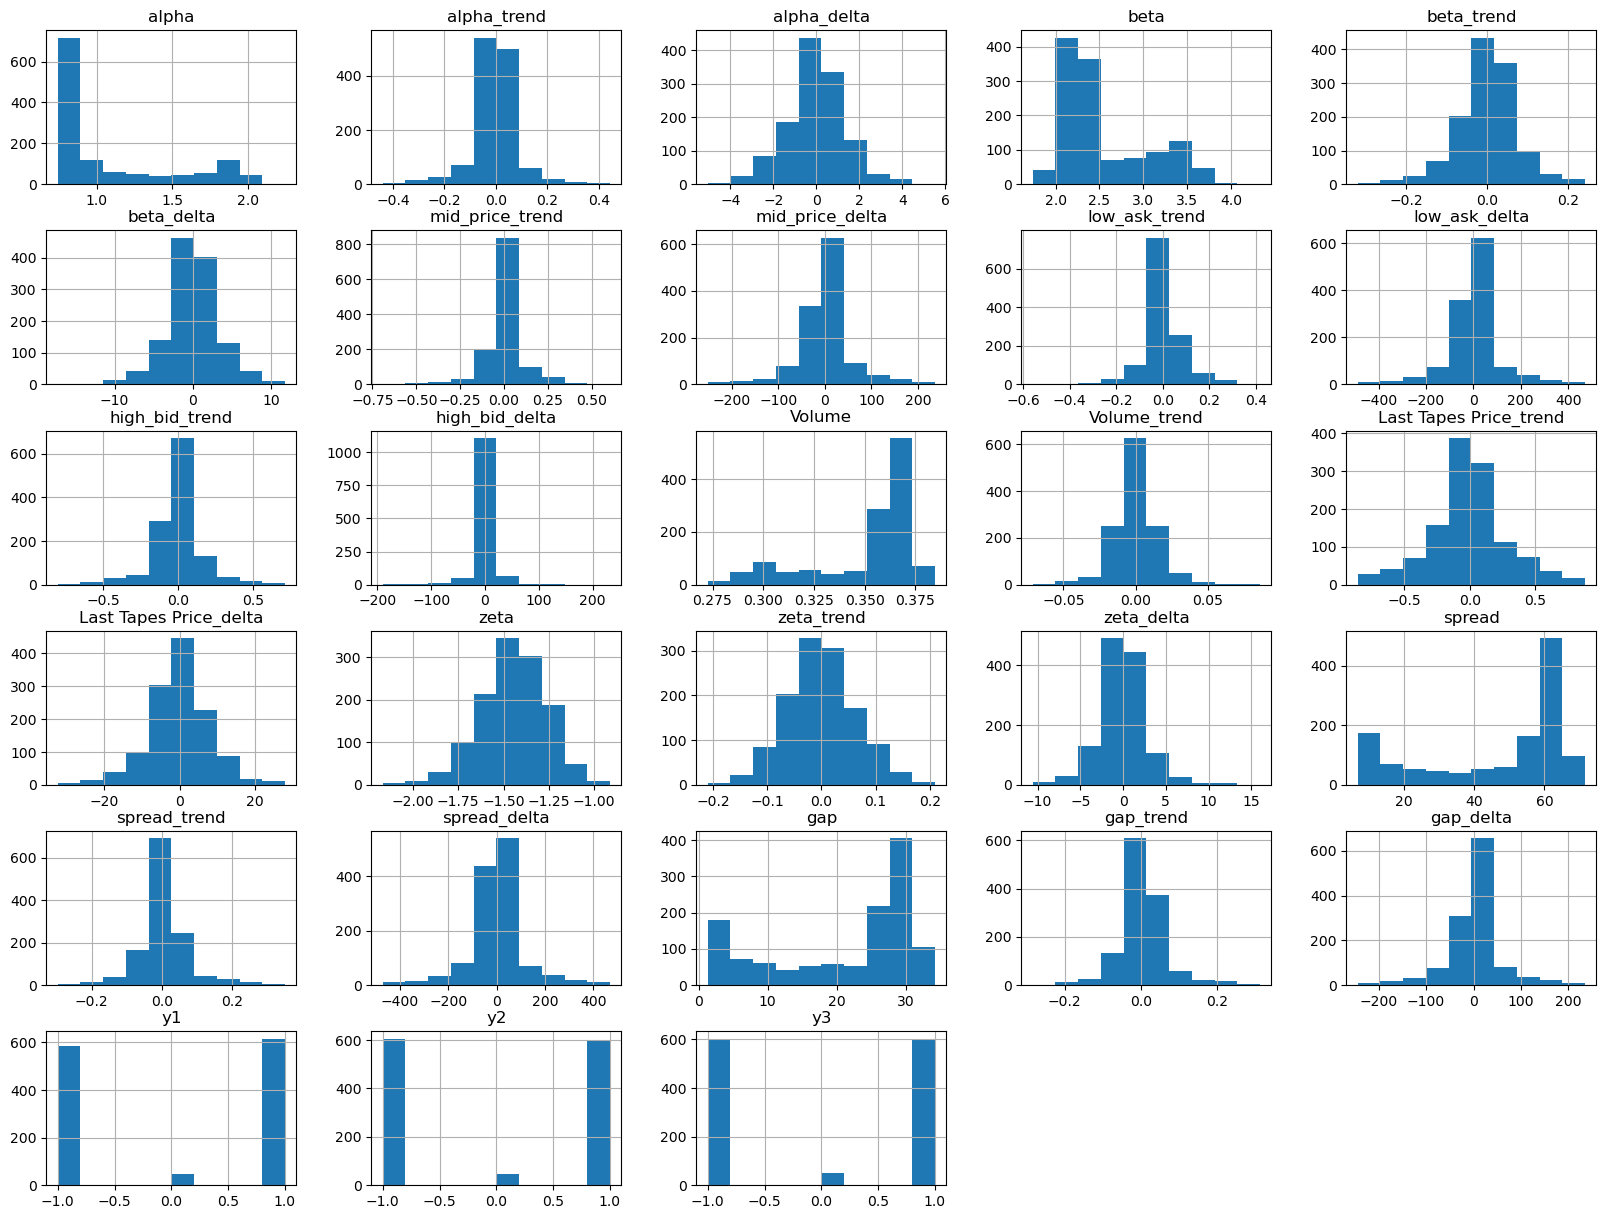

In [7]:
if "index" in list(sixty_df):
    sixty_df.drop(columns=["index"], inplace=True)
sixty_df.hist(figsize=(20,15))
plt.show()

# PCA

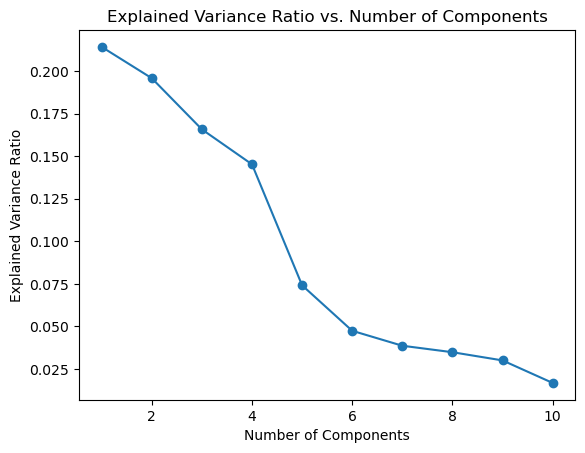

,PC1,PC2,PC3,PC4,PC5
0,-0.871914,2.287732,-1.884221,1.671466,0.058337
1,1.575387,4.091335,-0.959484,3.761828,2.220055
2,-1.467809,4.349777,-3.141831,7.735865,0.346572
3,0.761628,4.991053,-1.251119,1.469127,-1.267564
4,2.299777,3.385616,-1.037909,4.172988,2.000930
...,...,...,...,...,...
1245,-1.421730,-0.643957,-0.524850,-0.777486,-0.439917
1246,-1.386918,0.368918,3.493702,-0.731276,1.463259
1247,-1.358359,-0.829226,0.363251,1.144390,-1.850857
1248,0.049019,-1.066125,0.054856,-0.033578,0.644212


In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x_feats = list(sixty_df)
x_feats.remove("y1")
x_feats.remove("y2")
x_feats.remove("y3")

# Assuming 'sixty_df' is your DataFrame
# Drop any non-numeric columns if present
x_sixty_df = sixty_df[x_feats]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_sixty_df)

# Define the number of components (optional)
# If not specified, it will use all components
n_components = 10  # Example: You can change this to the number of components you want

# Initialize PCA
pca = PCA(n_components=n_components)

# Fit PCA to the scaled data
pca.fit(scaled_data)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

n_components = 5
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
# Transform the data onto the new feature space
pca_transformed = pca.transform(scaled_data)

# Create a DataFrame for the transformed data (optional)
pca_df = pd.DataFrame(data=pca_transformed, columns=[f"PC{i+1}" for i in range(n_components)])
pca_df


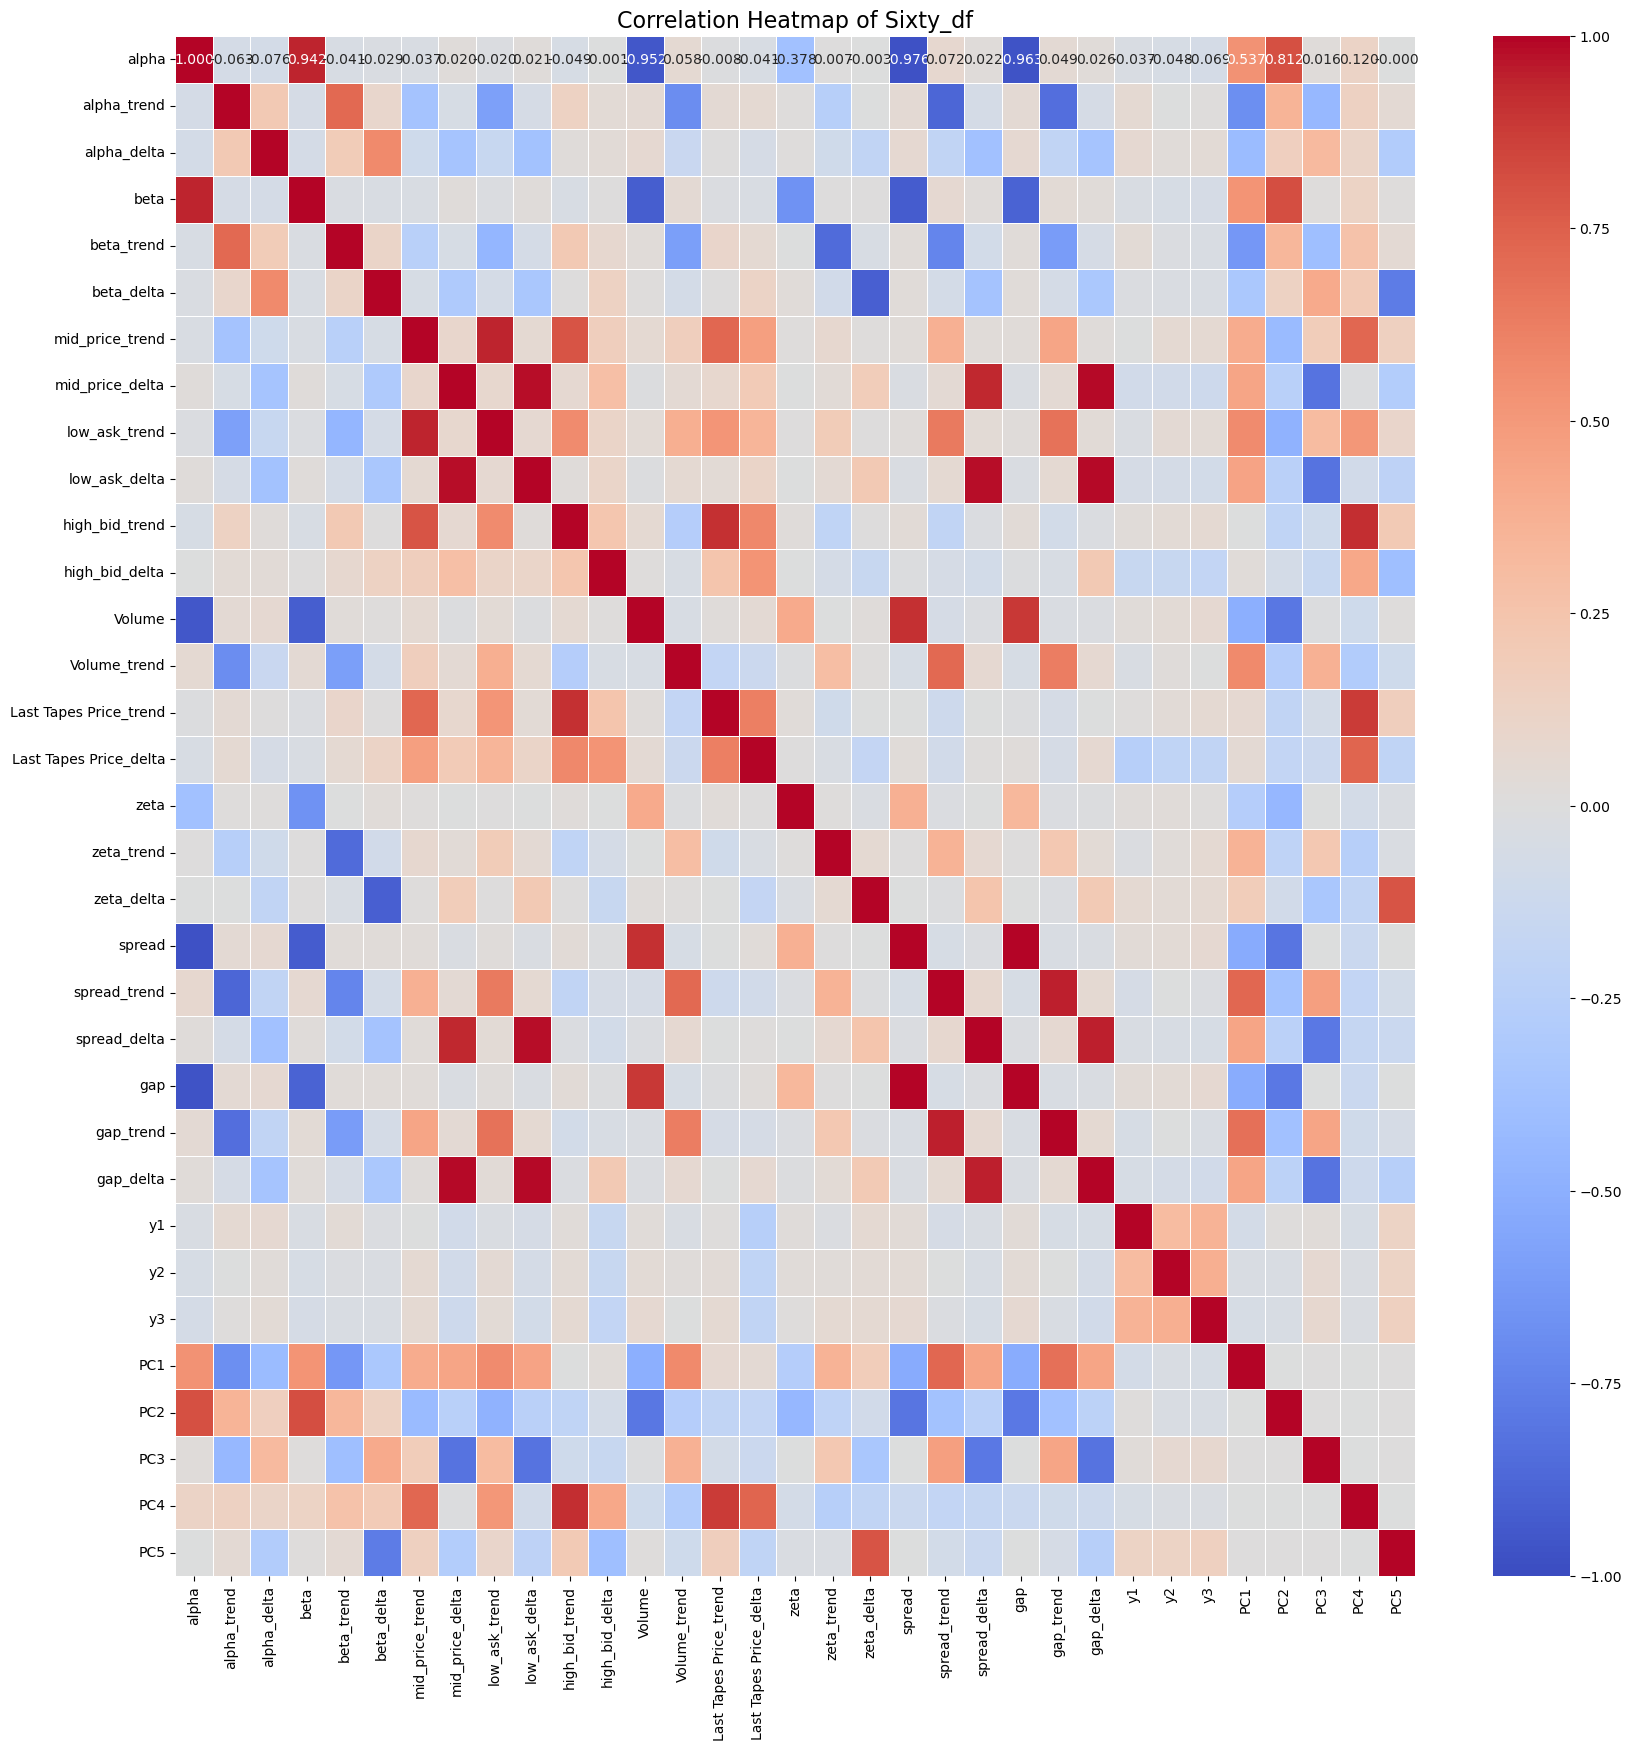

In [9]:
plt.figure(figsize=(20,20))
plt.title("Correlation Heatmap of Sixty_df", fontsize=16)

sns.heatmap(pd.concat([sixty_df, pca_df], axis = 1).corr(), annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, vmin = -1, vmax = 1)
plt.show()

# Logistic Regression

In [21]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

y_feat = "y1"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

# Create a logistic regression classifier
clf = LogisticRegression(random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1202
Cross-Validation Scores: [0.50622407 0.48547718 0.55416667 0.55833333 0.59583333]
Mean Accuracy: 0.5400069156293222
Baseline:  0.5124792013311148
Accuracy:  0.5574043261231281
              precision    recall  f1-score   support

          -1       0.48      0.55      0.51       510
           1       0.63      0.56      0.59       692

    accuracy                           0.56      1202
   macro avg       0.56      0.56      0.55      1202
weighted avg       0.57      0.56      0.56      1202



In [22]:
y_feat = "y2"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

# Create a logistic regression classifier
clf = LogisticRegression(random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1202
Cross-Validation Scores: [0.5560166  0.52697095 0.55416667 0.50416667 0.58333333]
Mean Accuracy: 0.5449308437067774
Baseline:  0.5041597337770383
Accuracy:  0.5590682196339434
              precision    recall  f1-score   support

          -1       0.57      0.56      0.57       620
           1       0.54      0.56      0.55       582

    accuracy                           0.56      1202
   macro avg       0.56      0.56      0.56      1202
weighted avg       0.56      0.56      0.56      1202



In [23]:
y_feat = "y3"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

# Create a logistic regression classifier
clf = LogisticRegression(random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1201
Cross-Validation Scores: [0.58091286 0.6        0.5875     0.5125     0.55833333]
Mean Accuracy: 0.5678492392807746
Baseline:  0.5020815986677769
Accuracy:  0.5711906744379683
              precision    recall  f1-score   support

          -1       0.58      0.57      0.58       610
           1       0.56      0.57      0.57       591

    accuracy                           0.57      1201
   macro avg       0.57      0.57      0.57      1201
weighted avg       0.57      0.57      0.57      1201



# SVC

In [24]:
from sklearn.svm import SVC

y_feat = "y1"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))


clf = SVC(kernel='linear', random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1202
Cross-Validation Scores: [0.50207469 0.4813278  0.54166667 0.54166667 0.61666667]
Mean Accuracy: 0.5366804979253111
Baseline:  0.5124792013311148
Accuracy:  0.5574043261231281
              precision    recall  f1-score   support

          -1       0.46      0.56      0.50       488
           1       0.65      0.56      0.60       714

    accuracy                           0.56      1202
   macro avg       0.56      0.56      0.55      1202
weighted avg       0.57      0.56      0.56      1202



In [14]:
y_feat = "y2"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))


clf = SVC(kernel='linear', random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1202
Cross-Validation Scores: [0.54771784 0.56846473 0.53333333 0.50833333 0.58333333]
Mean Accuracy: 0.5482365145228216
Baseline:  0.5041597337770383
Accuracy:  0.5690515806988353
              precision    recall  f1-score   support

          -1       0.63      0.57      0.59       670
           1       0.51      0.57      0.54       532

    accuracy                           0.57      1202
   macro avg       0.57      0.57      0.57      1202
weighted avg       0.58      0.57      0.57      1202



In [15]:
y_feat = "y3"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

clf = SVC(kernel='linear', random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1201
Cross-Validation Scores: [0.58091286 0.57916667 0.57916667 0.5        0.55833333]
Mean Accuracy: 0.5595159059474412
Baseline:  0.5020815986677769
Accuracy:  0.5703580349708576
              precision    recall  f1-score   support

          -1       0.61      0.57      0.59       645
           1       0.53      0.57      0.55       556

    accuracy                           0.57      1201
   macro avg       0.57      0.57      0.57      1201
weighted avg       0.57      0.57      0.57      1201



Naive Bayes

In [25]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes model
from sklearn.metrics import accuracy_score, classification_report

y_feat = "y1"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))


Sample size 1202
Cross-Validation Scores: [0.53112033 0.49377593 0.54166667 0.5125     0.55833333]
Mean Accuracy: 0.5274792531120331
Baseline:  0.5124792013311148
Accuracy:  0.5632279534109818
              precision    recall  f1-score   support

          -1       0.49      0.56      0.52       513
           1       0.63      0.57      0.60       689

    accuracy                           0.56      1202
   macro avg       0.56      0.56      0.56      1202
weighted avg       0.57      0.56      0.57      1202



In [27]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes model
from sklearn.metrics import accuracy_score, classification_report

y_feat = "y2"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))


Sample size 1202
Cross-Validation Scores: [0.57261411 0.55186722 0.54166667 0.50833333 0.575     ]
Mean Accuracy: 0.5498962655601659
Baseline:  0.5041597337770383
Accuracy:  0.5648918469217971
              precision    recall  f1-score   support

          -1       0.60      0.56      0.58       639
           1       0.53      0.56      0.55       563

    accuracy                           0.56      1202
   macro avg       0.56      0.56      0.56      1202
weighted avg       0.57      0.56      0.57      1202



In [28]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes model
from sklearn.metrics import accuracy_score, classification_report

y_feat = "y3"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))


Sample size 1201
Cross-Validation Scores: [0.56016598 0.59583333 0.6125     0.525      0.58333333]
Mean Accuracy: 0.5753665283540803
Baseline:  0.5020815986677769
Accuracy:  0.5878434637801832
              precision    recall  f1-score   support

          -1       0.65      0.58      0.61       676
           1       0.53      0.60      0.56       525

    accuracy                           0.59      1201
   macro avg       0.59      0.59      0.59      1201
weighted avg       0.60      0.59      0.59      1201



Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


# Assuming sixty_df is your DataFrame and it's already loaded

# Define your features and target variable
X = sixty_df.drop(['y1', 'y2', 'y3'], axis=1)
y = sixty_df['y1']  # Adjust according to your target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Specify parameters and distributions to sample from
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(1, 21)),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None] + list(range(5, 31))
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, verbose=1)

# Perform the random search
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best cross-validated accuracy:", random_search.best_score_)

# Train a final model with the best parameters
best_dt = random_search.best_estimator_

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))

# Evaluate the final model on the test set
y_pred = best_dt.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 17, 'min_samples_leaf': 4, 'max_leaf_nodes': 27, 'max_features': None, 'max_depth': 3, 'criterion': 'gini'}
Best cross-validated accuracy: 0.606
Baseline:  0.5072
Accuracy on Test Set: 0.548
              precision    recall  f1-score   support

          -1       0.50      0.72      0.59       107
           0       0.00      0.00      0.00         8
           1       0.63      0.44      0.52       135

    accuracy                           0.55       250
   macro avg       0.38      0.39      0.37       250
weighted avg       0.55      0.55      0.53       250



In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


# Assuming sixty_df is your DataFrame and it's already loaded

# Define your features and target variable
X = sixty_df.drop(['y1', 'y2', 'y3'], axis=1)
y = sixty_df['y2']  # Adjust according to your target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Specify parameters and distributions to sample from
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(1, 21)),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None] + list(range(5, 31))
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, verbose=1)

# Perform the random search
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best cross-validated accuracy:", random_search.best_score_)

# Train a final model with the best parameters
best_dt = random_search.best_estimator_

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))

# Evaluate the final model on the test set
y_pred = best_dt.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 17, 'min_samples_leaf': 4, 'max_leaf_nodes': 27, 'max_features': None, 'max_depth': 3, 'criterion': 'gini'}
Best cross-validated accuracy: 0.583
Baseline:  0.5232
Accuracy on Test Set: 0.604
              precision    recall  f1-score   support

          -1       0.59      0.80      0.68       123
           0       0.00      0.00      0.00        11
           1       0.63      0.45      0.53       116

    accuracy                           0.60       250
   macro avg       0.41      0.42      0.40       250
weighted avg       0.58      0.60      0.58       250



In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


# Assuming sixty_df is your DataFrame and it's already loaded

# Define your features and target variable
X = sixty_df.drop(['y1', 'y2', 'y3'], axis=1)
y = sixty_df['y3']  # Adjust according to your target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Specify parameters and distributions to sample from
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(1, 21)),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None] + list(range(5, 31))
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, verbose=1)

# Perform the random search
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best cross-validated accuracy:", random_search.best_score_)

# Train a final model with the best parameters
best_dt = random_search.best_estimator_

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))

# Evaluate the final model on the test set
y_pred = best_dt.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 16, 'min_samples_leaf': 17, 'max_leaf_nodes': 21, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'}
Best cross-validated accuracy: 0.5860000000000001
Baseline:  0.5216000000000001
Accuracy on Test Set: 0.504
              precision    recall  f1-score   support

          -1       0.52      0.37      0.44       118
           0       0.00      0.00      0.00        13
           1       0.49      0.69      0.58       119

    accuracy                           0.50       250
   macro avg       0.34      0.35      0.34       250
weighted avg       0.48      0.50      0.48       250



# Insights


In [16]:
from sklearn.model_selection import train_test_split

y_feat = "y1"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(random_state=random_state)

clf.fit(X_train, y_train)

ypred = clf.predict(X_test)
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1-baseline))
print(accuracy_score(ypred, y_test))

# Extracting coefficients and feature names
coefficients = clf.coef_[0]
feature_names = X_train.columns

for i, c in enumerate(coefficients):
    print(feature_names[i], c)

Baseline:  0.5124792013311148
0.5850622406639004
PC1 -0.07010136696670563
PC2 0.005699766383756936
PC3 0.025085331808258175
PC4 -0.03402186724415906
PC5 0.15768518313028987


In [17]:
y_feat = "y3"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

clf = SVC(kernel='linear', random_state=random_state)

# Define the number of folds for k-fold cross-validation
n_splits = 5  # You can adjust this as needed

# Initialize k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Get feature importances
feature_importances = clf.coef_[0]

for i, c in enumerate(feature_importances):
    print(feature_names[i], c)

# Map feature importances to feature names if available
# Note: Since you used PCA, feature names may not be available
# If not available, you can simply use indices as feature names
# feature_names = pca_df.columns  # Assuming pca_df has column names
# Alternatively, you can use the original column names from sixty_df

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1201


Cross-Validation Scores: [0.58091286 0.57916667 0.57916667 0.5        0.55833333]
Mean Accuracy: 0.5595159059474412
PC1 -0.09985867511227298
PC2 -0.0918169648873004
PC3 0.13131292701012853
PC4 -0.06181239585018261
PC5 0.40439315345384585
Baseline:  0.5020815986677769
Accuracy:  0.5703580349708576
              precision    recall  f1-score   support

          -1       0.61      0.57      0.59       645
           1       0.53      0.57      0.55       556

    accuracy                           0.57      1201
   macro avg       0.57      0.57      0.57      1201
weighted avg       0.57      0.57      0.57      1201

